Tarea: Examen intento 2
Nombre: Luciano Benjamín Recalde Carballo

In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos en un DataFrame de Pandas
df = pd.read_csv('data/VERSION A.csv')
# Ver las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head(10))
# Ver últimas filas del DataFrame
print("Últimas filas del DataFrame:")
print(df.tail(5))
# Obtener información general sobre el DataFrame
print("Información del DataFrame:")
print(df.info())
# Generar estadísticas descriptivas
print("Estadísticas descriptivas del DataFrame:")
print(df.describe())
# Inspeccionar los tipos de datos de las columnas
print("Tipos de datos de las columnas:")
print(df.dtypes)

Primeras filas del DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone s

Limpieza de datos

In [378]:
# Verificar duplicados
duplicate_rows = df.duplicated()
if duplicate_rows.any():
    print("Hay duplicados en el DataFrame")
    print(duplicate_rows)
else:
    print("No hay duplicados en el DataFrame")

#MonthlyCharges es float64, por lo tanto TotalCharges debería serlo también, cómo Total Charges es de tipo objeto se asume que hay valores que no son del tipo flotante
def isfloat(num): #esta función verifica si el valoor ingresado es de tipo float
    try:
        float(num)
        return True
    except ValueError:
        return False
cantidad = 0
finvalido = []
for i in range(len(df)):
    if (not isfloat(df.iloc[i,19])): # se verifica si es float y en caso de no serlo, se visualiza para evaluar cómo repararlo
        print("El valor de la fila ", i ," columna TotalCharges es [", df.iloc[i,19], "]")
        cantidad += 1
        finvalido.append(i)
print("Se encontraron ", cantidad, "valores inválidos en las filas ,", finvalido)
customer_with_total_charges_null = df.query('TotalCharges == " "') # se hace un query con las entradas de los casos en cuestion
#EN ESTE CASO PODEMOS ELEGIR entre 2 COSAS A HACER
    #1 Calcular el TotalCharge Aproximado de acuerdo a los costos mensuales y el tenure (cantidad de meses de permanencia)
def get_calc_total_charges(df):
    total_charges_calc = []
    sliced_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
    total_charges_calc = sliced_values['tenure'] * sliced_values['MonthlyCharges']
    return total_charges_calc
    #2 Desechar estas entradas del dataset y trabajar en base a las entradas completas
# Si optamos por realizar la opcion 1: Haciendo calculos con otros clientes, he observado que hacer TotalCharges = Tenure * MonthlyCharge no es exacto, se asume que existe 
# la posibilidad de que se apliquen descuentos, multas por retraso, clientes que adquieren un servicio extra por un tiempo corto, etc.

# Si optamos por la opcion 2: Descartamos esas entradas, evitando ingresar errores, la muestra es lo suficientemente grande para que no sea afectada notablemente por ello.
# optaremos por la opcion 2, ya que la cantidad de entradas hace que esto afecte de forma despreciable al analisis
def corregir_descartando_entradas_con_TotalCharges_nulos(df):
    df.drop(df[df['TotalCharges'] == " "].index, inplace = True)
corregir_descartando_entradas_con_TotalCharges_nulos(df)
df['TotalCharges'] = df['TotalCharges'].astype(float)
# Verificación valores categóricos
print("Valores únicos en la columna 'gender':")
print(df['gender'].unique())

print("Valores únicos en la columna 'seniorCitizen':")
print(df['SeniorCitizen'].unique())

print("Valores únicos en la columna 'partner':")
print(df['Partner'].unique())

print("Valores únicos en la columna 'Dependents':")
print(df['Dependents'].unique())

print("Valores únicos en la columna 'PhoneService':")
print(df['PhoneService'].unique())

print("Valores únicos en la columna 'MultipleLines':")
print(df['MultipleLines'].unique())

print("Valores únicos en la columna 'InternetService':")
print(df['InternetService'].unique())

print("Valores únicos en la columna 'OnlineSecurity':")
print(df['OnlineSecurity'].unique())

print("Valores únicos en la columna 'OnlineBackup':")
print(df['OnlineBackup'].unique())

print("Valores únicos en la columna 'DeviceProtection':")
print(df['DeviceProtection'].unique())

print("Valores únicos en la columna 'TechSupport':")
print(df['TechSupport'].unique())

print("Valores únicos en la columna 'StreamingTV':")
print(df['StreamingTV'].unique())

print("Valores únicos en la columna 'StreamingMovies':")
print(df['StreamingMovies'].unique())

print("Valores únicos en la columna 'Contract':")
print(df['Contract'].unique())

print("Valores únicos en la columna 'PaperlessBilling':")
print(df['PaperlessBilling'].unique())

print("Valores únicos en la columna 'PaymentMethod':")
payment_methods = df['PaymentMethod'].unique()
print(payment_methods)

print("Valores únicos en la columna 'Churn':")
print(df['Churn'].unique())

#Todas las columnas con datos categóricos poseen valores estandarizados segun el dataset provisto

def get_customer_with_not_any_basic_service(df): #funcion para verificar que un cliente posea al menos un servicio
    client_without_service = df.query('InternetService == "No" & PhoneService == "No"')
    if client_without_service.empty:
        print("No existen registros de clientes que no contratan ningun servicio")
    else:
        print("Existen registros de clientes que realmente no poseen servicios contratados")
        print(client_without_service)

def get_multiple_line_client_with_no_phone_service(df):
    client_without_phone_service_and_with_multiple_lines = df.query('PhoneService == "No" & MultipleLines == "Yes"')
    if client_without_phone_service_and_with_multiple_lines.empty:
        print("No existen registros de clientes que figuren con lineas multiples sin contar con servicio de telefonia")
    else:
        print("Existen registros de clientes que figuran con lineas multiples, pero no cuentan con servicio de telefonia")
        print(client_without_phone_service_and_with_multiple_lines)

def get_customer_with_inconsistency_between_InternetService_and_bundle_services(df):
    error = 0
    customer_with_no_internet_services = df.query('InternetService == "No"')
    if not customer_with_no_internet_services.query('OnlineSecurity != "No internet service"').empty:
        error = 1
        print("Existen registros en donde un cliente adquiere el servicio de seguridad online, sin contar con el servicio de internet")
        print(customer_with_no_internet_services.query('OnlineSecurity != "No internet service"'))
    if not customer_with_no_internet_services.query('OnlineBackup != "No internet service"').empty:
        error = 1
        print("Existen registros en donde un cliente adquiere el servicio de Respaldo online, sin contar con el servicio de internet")
        print(customer_with_no_internet_services.query('OnlineBackup != "No internet service"'))
    if not customer_with_no_internet_services.query('DeviceProtection != "No internet service"').empty:
        error = 1
        print("Existen registros en donde un cliente adquiere el servicio de Proteccion de dispositivos, sin contar con el servicio de internet")
        print(customer_with_no_internet_services.query('DeviceProtection != "No internet service"'))
    if not customer_with_no_internet_services.query('TechSupport != "No internet service"').empty:
        error = 1
        print("Existen registros en donde un cliente adquiere el servicio de soporte tecnologico/tecnico, sin contar con el servicio de internet")
        print(customer_with_no_internet_services.query('TechSupport != "No internet service"'))
    if not customer_with_no_internet_services.query('StreamingTV != "No internet service"').empty:
        error = 1
        print("Existen registros en donde un cliente adquiere el servicio de TV, sin contar con el servicio de internet")
        print(customer_with_no_internet_services.query('StreamingTV != "No internet service"'))
    if not customer_with_no_internet_services.query('StreamingMovies == "No" & OnlineSecurity != "No internet service"').empty:
        error = 1
        print("Existen registros en donde un cliente adquiere el servicio de streaming de peliculas, sin contar con el servicio de internet")
        print(customer_with_no_internet_services.query('StreamingMovies != "No internet service"'))
    if error == 0:
        print("no existen inconsistencias entre servicio de internet y sub servicios")
def check_charges_inconsistencies(df):
    diff = []
    sliced_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
    diff = sliced_values['TotalCharges'].astype(float) - (sliced_values['tenure'] * sliced_values['MonthlyCharges'])
    print(diff.sort_values(ascending=False)) 
    # con esto se observa que no existe inconsistencia entre el TotalCharge de la entrada y el TotalCharge calculado a partir del costo mensual
    # aunque existe una diferencia de hasta +/-370 aproximadamente, al tratarse de un desvio simetrico se asume que es natural de la forma en la
    # que la empresa trabaja sus cargos


get_customer_with_not_any_basic_service(df)
get_multiple_line_client_with_no_phone_service(df)
get_customer_with_inconsistency_between_InternetService_and_bundle_services(df)
print(df.info())
check_charges_inconsistencies(df)



No hay duplicados en el DataFrame
El valor de la fila  488  columna TotalCharges es [   ]
El valor de la fila  753  columna TotalCharges es [   ]
El valor de la fila  936  columna TotalCharges es [   ]
El valor de la fila  1082  columna TotalCharges es [   ]
El valor de la fila  1340  columna TotalCharges es [   ]
El valor de la fila  3331  columna TotalCharges es [   ]
El valor de la fila  3826  columna TotalCharges es [   ]
El valor de la fila  4380  columna TotalCharges es [   ]
El valor de la fila  5218  columna TotalCharges es [   ]
El valor de la fila  6670  columna TotalCharges es [   ]
El valor de la fila  6754  columna TotalCharges es [   ]
Se encontraron  11 valores inválidos en las filas , [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
Valores únicos en la columna 'gender':
['Female' 'Male']
Valores únicos en la columna 'seniorCitizen':
[0 1]
Valores únicos en la columna 'partner':
['Yes' 'No']
Valores únicos en la columna 'Dependents':
['No' 'Yes']
Valores 

Exploraciones

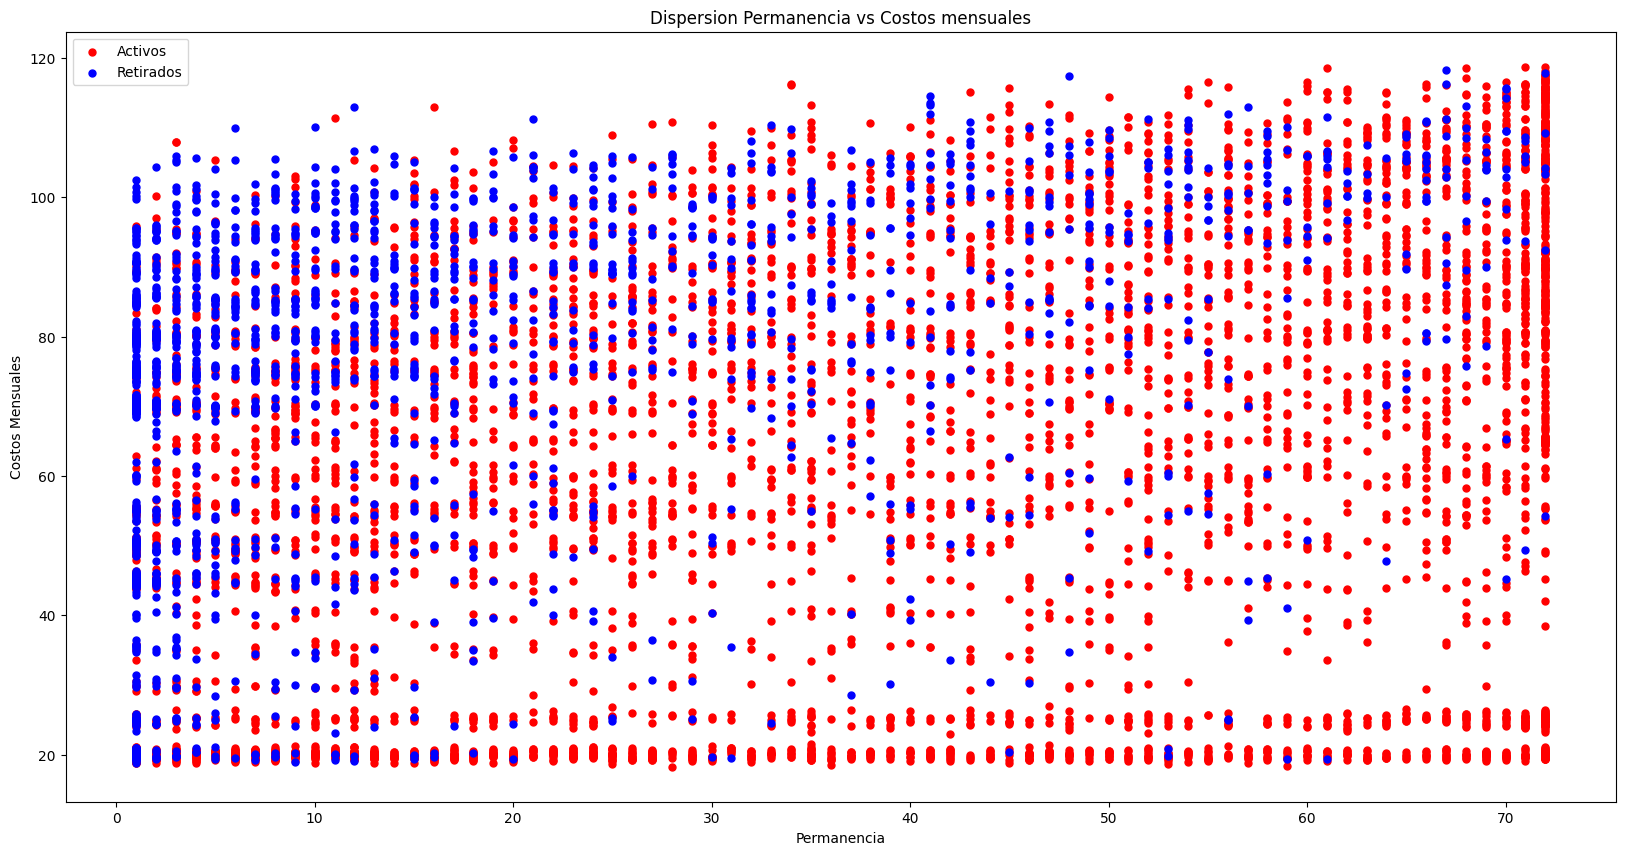

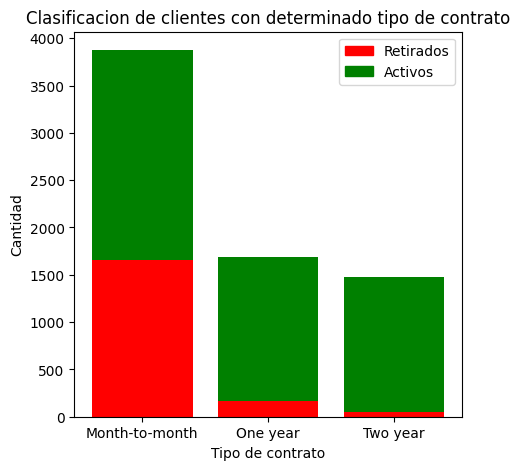

In [379]:
def plot_contract_type_clasification(df):
    activos = df.query('Churn == "No"')
    retirados = df.query('Churn == "Yes"')
    y = df["Contract"].value_counts()
    y2 = retirados["Contract"].value_counts()
    x = df["Contract"].unique()
    colors = {'Retirados':'red', 'Activos':'green'}  # Este fragmento de codigo para generar la leyenda del barplot fue extraido de 
    labels = list(colors.keys())                    # https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.figure(figsize=(5,5))
    plt.bar(x, y, color='g', label='Activos')
    plt.bar(x, y2, color='r',label='Retirados')
    plt.xlabel('Tipo de contrato')
    plt.ylabel('Cantidad')
    plt.title('Clasificacion de clientes con determinado tipo de contrato')
    plt.legend(handles, labels)
    plt.show()

    
def plot_tenure_vs_monthly_charges(df):
    activos = df.query('Churn == "No"')
    retirados = df.query('Churn == "Yes"')
    x = activos['tenure']
    y = activos['MonthlyCharges']
    x2 = retirados['tenure']
    y2 = retirados['MonthlyCharges']       
    plt.figure(figsize=(20,10))
    plt.scatter(x, y, color='r', marker='.', s=100, label='Activos')
    plt.scatter(x2, y2, color='b', marker='.', s=100, label='Retirados')
    plt.title("Dispersion Permanencia vs Costos mensuales")
    plt.xlabel("Permanencia")
    plt.ylabel("Costos Mensuales")
    plt.legend()
    plt.show()

plot_tenure_vs_monthly_charges(df)
plot_contract_type_clasification(df)

En el grafico de dispersion se observa que la mayor parte de los clientes que dejaron de contratar los servicios son aquellos con un costo mensual por encima de 60
Se observa que tambien hay clientes con muy baja permanencia antes de retirar los servicios.
Por otra parte se observa que aquellos que pagan menor costo mensual presentan menos deserciones.
La empresa podria trabajar en paquetes que posean costos mensuales bajos o intermedios si desea reducir deserciones. Tambien incentivar a aquellos clientes durante los primeros 20 meses para reducir deserciones prematuras.

En el grafico de barras se observa la cantidad de clientes de acuerdo a su tipo de contrato y si este se trata de un cliente activo o un cliente retirado. Se observa que la mayor parte opta por un plan mes a mes, tambien observamos mayor desercion en este modelo.
Se observa que los clientes que poseen contratos anuales o bi anuales son aquellos con menor cantidad de deserciones.

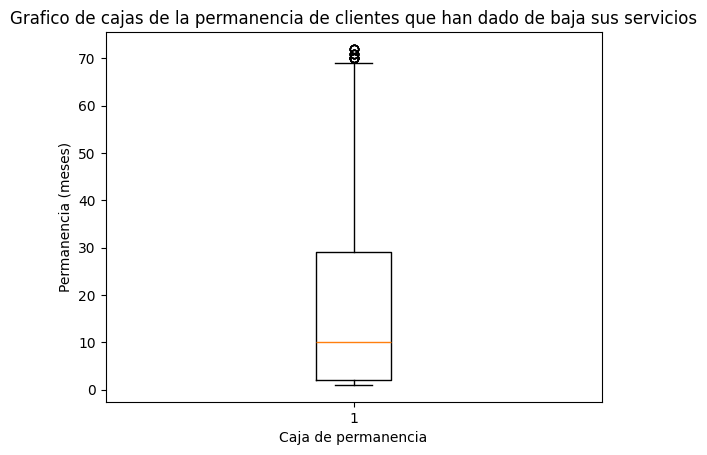

In [380]:
retirados = df.query('Churn == "Yes"')
plt.boxplot(retirados[['tenure']])
plt.title("Grafico de cajas de la permanencia de clientes que han dado de baja sus servicios")
plt.ylabel("Permanencia (meses)")
plt.xlabel("Caja de permanencia")
plt.show()

En el grafico de cajas se observa la variable permanencia, se ve que la misma tiene la media bastante baja y que no existen muchos clientes con alta permanencia.
El valor maximo esta bastante distante de la media y el Q3 es bastante mayor que el cuartil 1


                  tenure  MonthlyCharges  TotalCharges  SeniorCitizen
tenure          1.000000        0.246862      0.825880       0.015683
MonthlyCharges  0.246862        1.000000      0.651065       0.219874
TotalCharges    0.825880        0.651065      1.000000       0.102411
SeniorCitizen   0.015683        0.219874      0.102411       1.000000
                  tenure  MonthlyCharges  TotalCharges  SeniorCitizen
tenure          1.000000        0.275339      0.889177       0.017408
MonthlyCharges  0.275339        1.000000      0.638032       0.220737
TotalCharges    0.889177        0.638032      1.000000       0.107248
SeniorCitizen   0.017408        0.220737      0.107248       1.000000
                  tenure  MonthlyCharges  TotalCharges  SeniorCitizen
tenure          1.000000        0.189785      0.734016       0.014369
MonthlyCharges  0.189785        1.000000      0.459904       0.180366
TotalCharges    0.734016        0.459904      1.000000       0.087575
SeniorCitizen   0.01

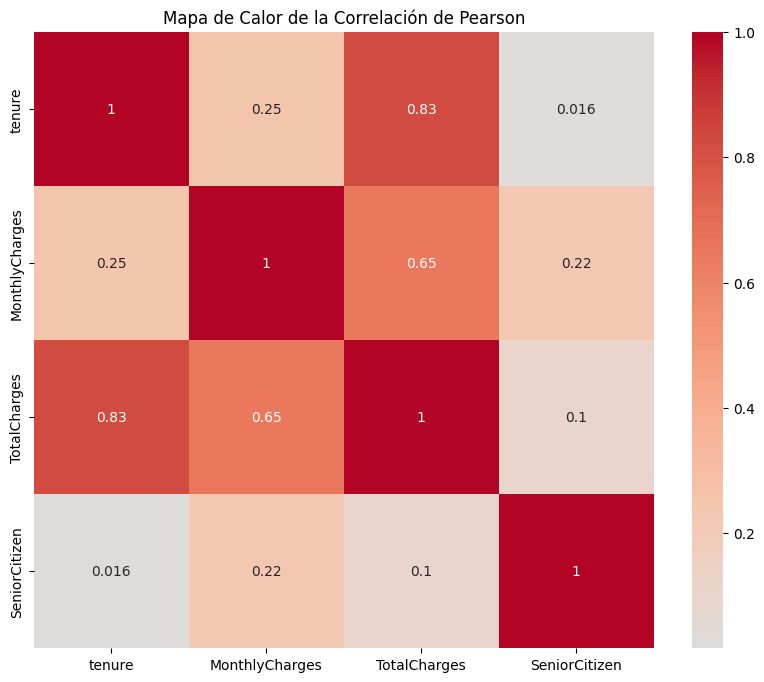

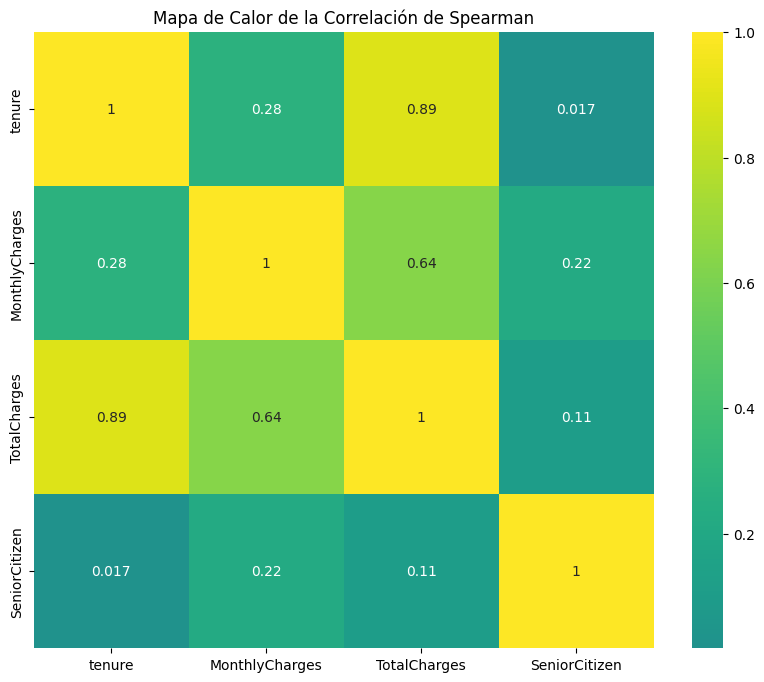

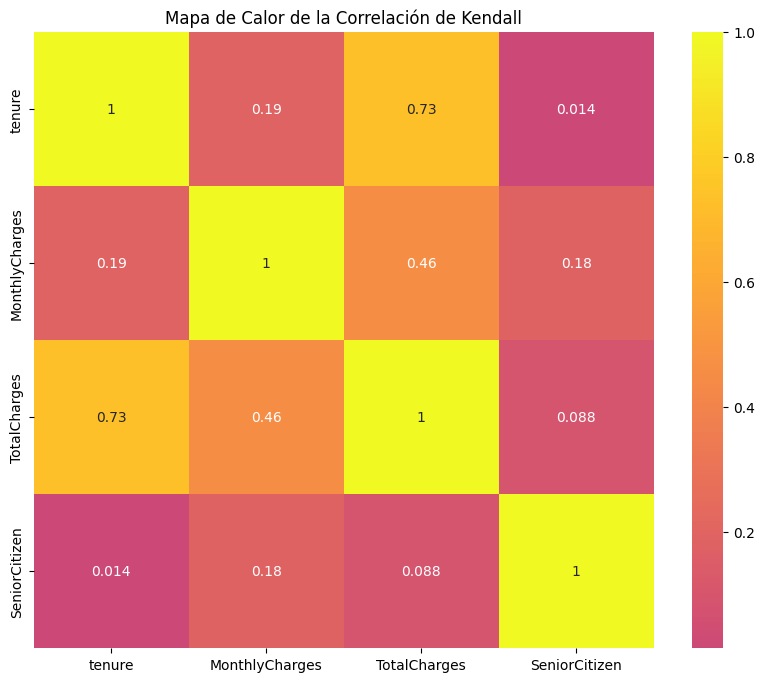

In [381]:
# Cálculo de la correlación de Pearson
df2 = df[['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']]
df2 = df2.astype(float)
#Calculo de la correlacion de Pearson
correlation_matrix = df2.corr(method='pearson')
print(correlation_matrix)
# Cálculo de la correlación de Spearman
spearman_corr = df2.corr(method='spearman')
print(spearman_corr)

# Cálculo de la correlación de Kendall
kendall_corr = df2.corr(method='kendall')
print(kendall_corr)

# Mapa de calor Pearson
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

# Mapa de calor Spearmann
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

# Mapa de calor Kendall
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()

En el mapa de calor de Pearson se observan una alta relacion entre la permanencia y, los cargos totales y mensuales
En el mapa de calor de Spearmann se observan una alta relacion entre la permanencia y, los cargos totales y mensuales
En el mapa de calor de kendall se observa una alta relacion entre la permanencia y los cargos totales
Por lo tanto los valores de mayor interes para aumentar la permanencia de los clientes son los cargos totales y mensuales